# About Dataset

### Dataset Description:
The Iris dataset contains measurements of four features (attributes) for 150 iris flowers, and each flower belongs to one of three species: Setosa, Versicolor, or Virginica. The four features are:

***Sepal Length:*** The length of the iris flower's sepal (the green leaf-like structure at the base of the flower).

***Sepal Width:*** The width of the iris flower's sepal.

***Petal Length:*** The length of the iris flower's petal (the colorful part of the flower).

***Petal Width:*** The width of the iris flower's petal.

> The Dataset is available in this link:https://www.kaggle.com/datasets/saurabh00007/iriscsv


** In this we are going to take the following approach:***

1. Data

2. Data Preprocessing

3. Model Selection 

4. Model Training

5. Model Evaluation

6. Predictions


In [53]:
# Importing the all Tools as we needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Load the Data

In [54]:
df = pd.read_csv("Iris.data.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
df.shape

(150, 6)

In [56]:
# If you need infromation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [57]:
# Here we don't need "Id" column, due to we have index
df = df.drop(columns=["Id"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [58]:
# Check wether there are Null Values are present in our dataset or not
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [59]:
#Check for the duplicates
df_1 = df.drop_duplicates(subset="Species")
df_1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


In [60]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
# Lets Check the basic statistics about the data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Pre-processing Data

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


> Here we "Species" is an object, so let's convert it into Numerical form using LabelEncoder() 

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [64]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [65]:
# Number of samples in Species class
df["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# Data  Visualization 

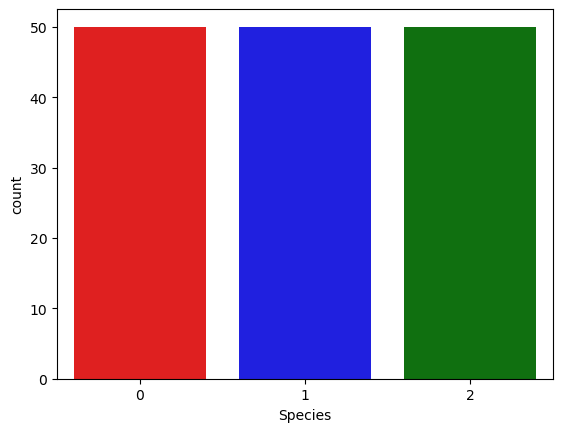

In [66]:
sns.countplot(x="Species",
             data=df,
             palette=['r', 'b', 'g']);

In [67]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Compare sepal length	vs sepal width

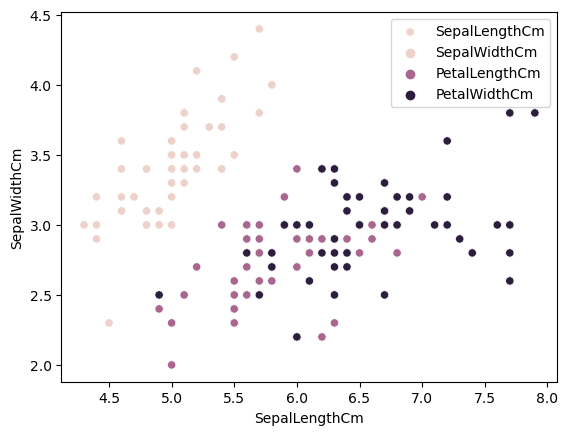

In [68]:
# compare Sepallenght and Sepalwidth
sns.scatterplot(x="SepalLengthCm", 
                y="SepalWidthCm",
                hue="Species", 
                data=df)
plt.legend(["SepalLengthCm","SepalWidthCm", "PetalLengthCm", "PetalWidthCm" ])

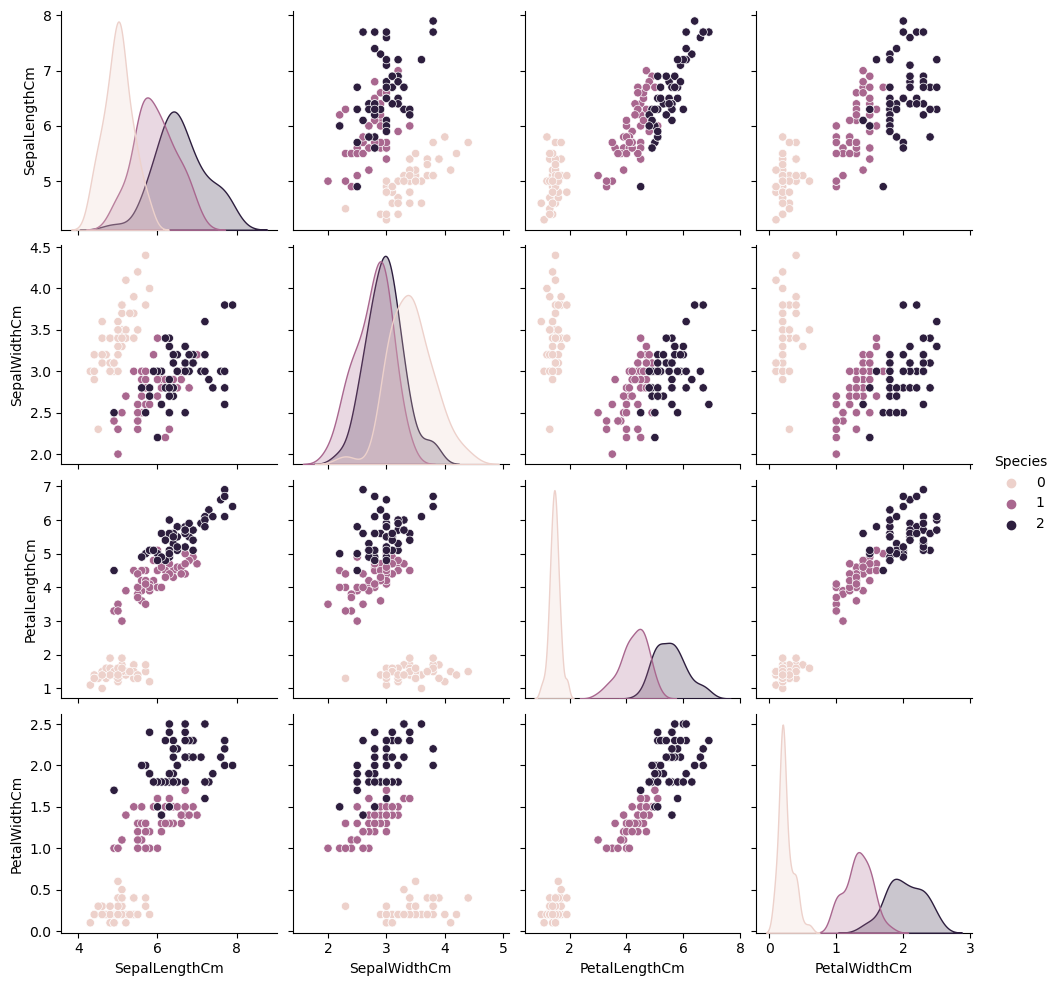

In [69]:
# Let's import the packages
sns.pairplot(df, hue="Species");

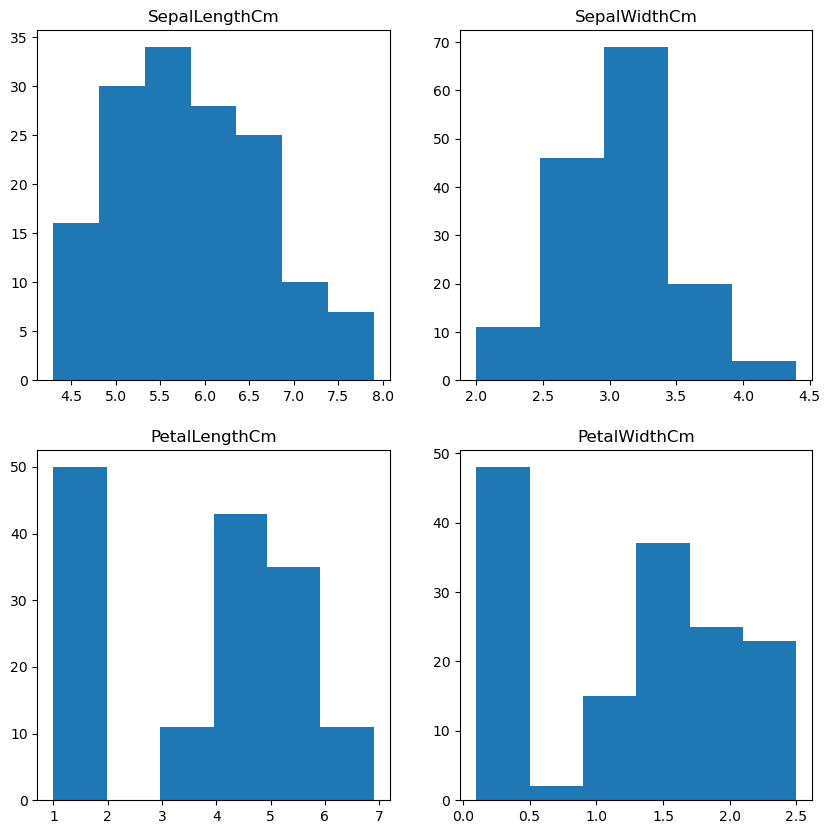

In [70]:
# Let's see the distribution of data for various columns using histogram
fig, ax = plt.subplots(2,2, figsize=(10, 10))
ax[0,0].hist(df["SepalLengthCm"], bins=7)
ax[0,0].set_title("SepalLengthCm")
ax[0,1].hist(df["SepalWidthCm"], bins=5)
ax[0,1].set_title("SepalWidthCm")
ax[1,0].hist(df["PetalLengthCm"], bins=6)
ax[1,0].set_title("PetalLengthCm")
ax[1,1].hist(df["PetalWidthCm"], bins=6)
ax[1,1].set_title("PetalWidthCm");

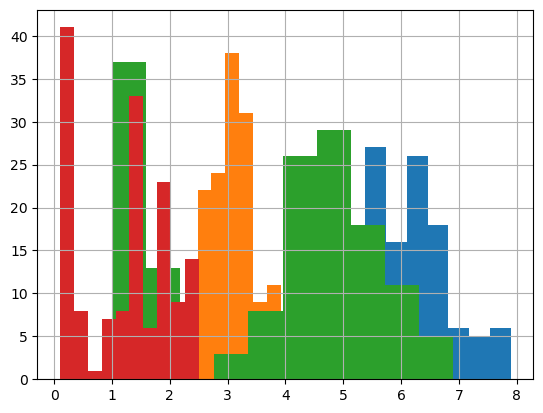

In [71]:
# potting the all histogram features together
df["SepalLengthCm"].hist()
df["SepalWidthCm"].hist()
df["PetalLengthCm"].hist()
df["PetalWidthCm"].hist();

## Correlation Matrix

In [72]:
# Make the Correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


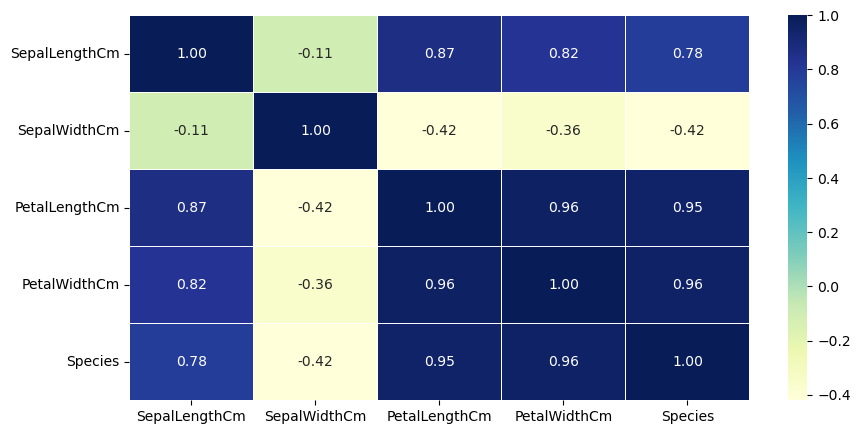

In [73]:
# Let's make our correlation matrix a little pettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [74]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [75]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

# Model training

In [76]:
x = df.drop(columns=["Species"])
y = df["Species"]

In [77]:
# Split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                    test_size=0.3, random_state=1)

> Now we've got our data split into training and testing sets, it's time to build a machine learning model.

we'll train it(find the patterns) on the training set.

And we'll test it(use the patterns) on the test set.

we're going to try 3 different machine learning models.

1. Logistic Regression.

2. K-Nearest Neighbours Classifier

3. Random Forest Classifier

4. Decision trees

5. MLPClassifier

In [78]:
# Put the models int the dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNeighbores": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
         "RandomForest": RandomForestClassifier(),
         "Linear Regression": LinearRegression(),
         "Neural Networks": MLPClassifier()}

# Create a function to fit and score models

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit_learn machine learning models.
    x_train: training dataset(no lables)
    x_test: testing dataset (no labels)
    y_train: training dataset
    y_test: test lables
    """
    
    # set random set
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    
    return model_scores

In [81]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.9777777777777777,
 'KNeighbores': 0.9777777777777777,
 'Decision Tree': 0.9555555555555556,
 'RandomForest': 0.9555555555555556,
 'Linear Regression': 0.9082844376254666,
 'Neural Networks': 0.9111111111111111}

## Model Comparison

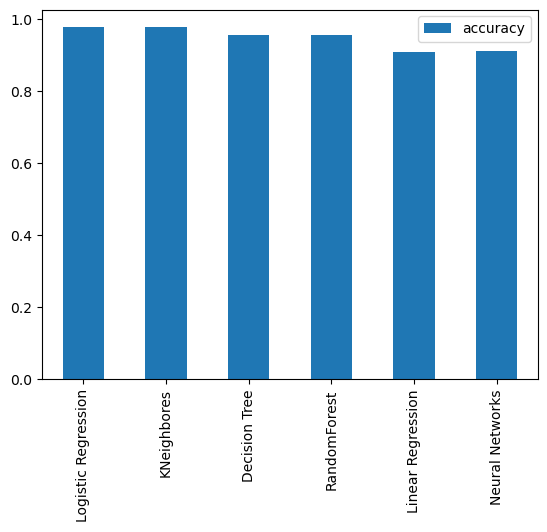

In [83]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

> Now we'vw got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

1. Hyperparameter Tuning

2. Feature Importance

3. Confusion Matrix

4. Cross-validation

5. Precision

6. Recall

7. F1 score

8. Classification Report

9. ROC Curve

10. Area Under the Curve(AUC)|

## Hyperparameter Tuning

In [90]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

Maximum KNN score on the test data: 97.777778%


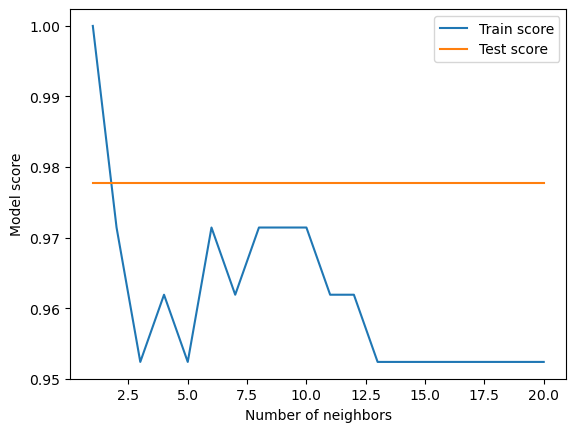

In [91]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:2f}%")

## Hyperparameters tuning using RandomizedSearchCV

We're going to tune:

1. LogisticRegression()

2. RandomForestClassifier()

......using RandomizedSearchCV

In [92]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# create a hyperparameter grid for RanodmForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [93]:
# Tune LogisticRegression

np.random.seed(42)


# Setup random hyperparameter search for Logisticregression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit the hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [94]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [96]:
rs_log_reg.score(x_test, y_test)

0.9555555555555556

# Hyperparameter using GridSearchCV

> Since our LogisticRegression model provides the best socres so far, we'll try and improve them again using GridSearchCV

In [97]:
# different hyperparameters for our LogisticRegression model.
log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model.
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [98]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [99]:
# Evaluate the grid Search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.9333333333333333

In [100]:
model_scores

{'Logistic Regression': 0.9777777777777777,
 'KNeighbores': 0.9777777777777777,
 'Decision Tree': 0.9555555555555556,
 'RandomForest': 0.9555555555555556,
 'Linear Regression': 0.9082844376254666,
 'Neural Networks': 0.9111111111111111}

## Confusion Matrix

In [101]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [102]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[14  0  0]
 [ 0 15  3]
 [ 0  0 13]]


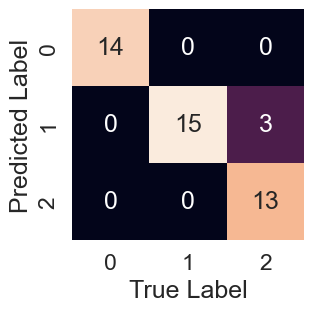

In [104]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborns's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
    #bottom, top = ax.get_ylim()
    ##ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

## Classification Report

In [106]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.83      0.91        18
           2       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45



## Accuracy

In [128]:
model_scores

{'Logistic Regression': 0.9777777777777777,
 'KNeighbores': 0.9777777777777777,
 'Decision Tree': 0.9555555555555556,
 'RandomForest': 0.9555555555555556,
 'Linear Regression': 0.9082844376254666,
 'Neural Networks': 0.9111111111111111}

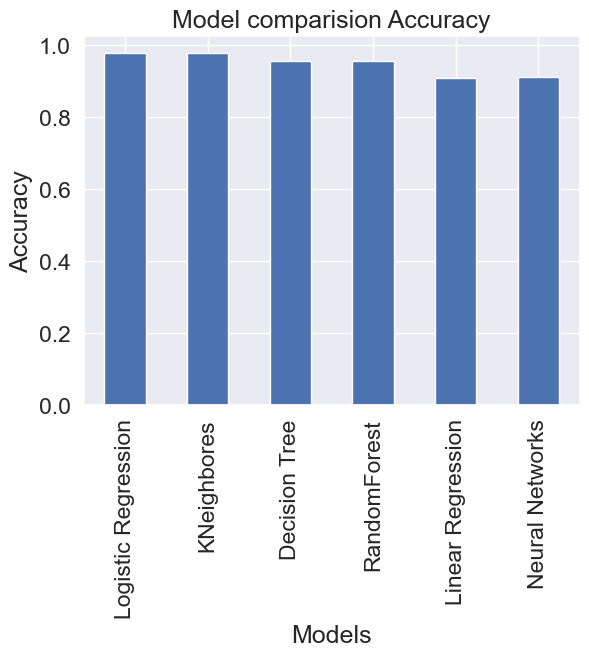

In [151]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(title="Model comparision Accuracy", legend=False)
plt.xlabel("Models")
plt.ylabel("Accuracy");

# Feature Importance

> Feature Importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?

> Finding Feature Importance is different for each machine learning model. One way to find feature importance is to search for( MODEL NAME) feature importnace.

Let's find the feature importance for our LogisticRegression model

In [152]:
# Fit the instance of LogisticRegression
clf = LogisticRegression(C = 0.20433597178569418,
                        solver="liblinear")
clf.fit(x_train, y_train);

In [153]:
# Check Coeff
clf.coef_

array([[ 0.26298341,  0.87118143, -1.39677482, -0.63784286],
       [ 0.18280131, -0.8583682 ,  0.24792089, -0.33683402],
       [-0.83353358, -0.51819469,  1.15515953,  0.96220914]])

In [154]:
# Match the coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'SepalLengthCm': 0.26298340553653266,
 'SepalWidthCm': 0.8711814344689254,
 'PetalLengthCm': -1.396774815925951,
 'PetalWidthCm': -0.6378428572869327}

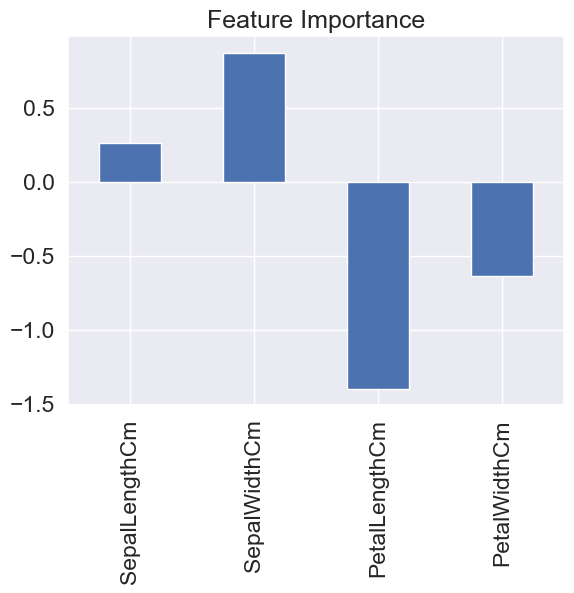

In [155]:
# Visualize feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);